# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [6]:
system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")
df<- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(df)
library(tidyverse)
d1<-df %>%
select(Subject, Gender, Flanker_Unadj,FS_IntraCranial_Vol, FS_Total_GM_Vol, FS_Tot_WM_Vol) %>%
drop_na()
head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Total_GM_Vol,FS_Tot_WM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,807245,543134
2,100307,F,112.56,1512540,664124,407292
3,100408,M,121.18,1684117,726206,500417
4,100610,M,126.53,1816044,762308,512946
5,101006,F,101.85,1437868,579632,429449
6,101107,M,107.04,1512727,665024,416995


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

`geom_smooth()` using formula = 'y ~ x'


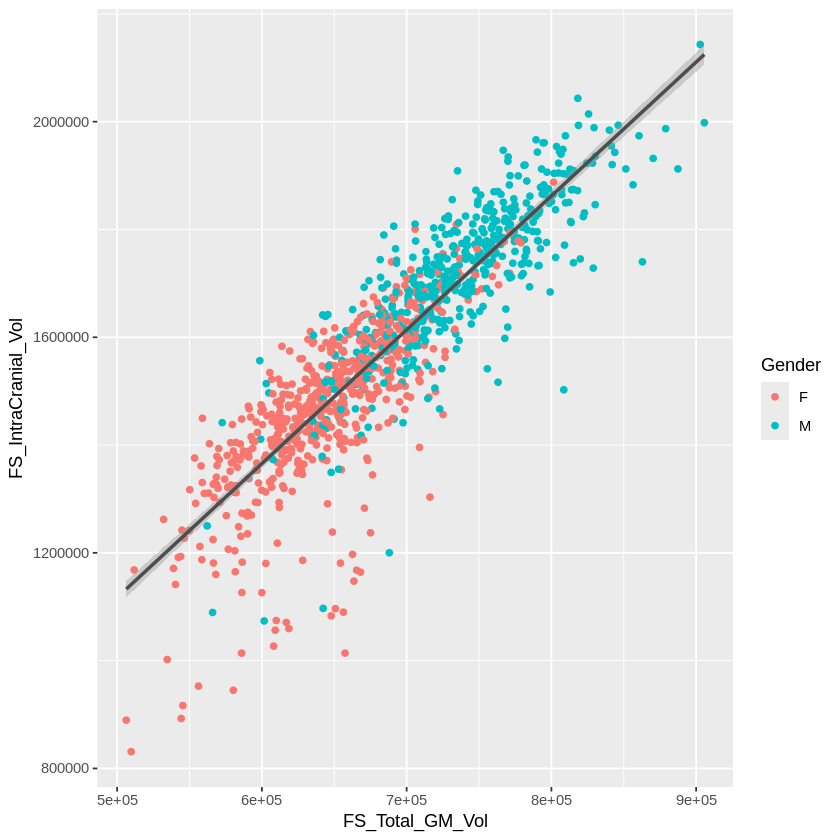

In [5]:
library(ggplot2)
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point() +
  geom_smooth(se = TRUE, method = "lm", color = "grey30")


What patterns do you observe in the scatter plot?

> The data fit the linear model; the distribution appears to be normal. This suggests a positive association between intracranial volume and total gray matter volume, controlling for gender. As gray matter increases, so does intracranial volume. Particularly, males are concentrated in the upper part of the graph exhibiting more intracraneal volume and gray matter overall compared to females.
>

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [13]:
d1$Gender <- as.factor(d1$Gender)

model_log <- glm(Gender ~ FS_Total_GM_Vol + FS_Tot_WM_Vol + FS_IntraCranial_Vol,
                 data = d1,
                 family = binomial(link = "logit"))

summary(model_log)


Call:
glm(formula = Gender ~ FS_Total_GM_Vol + FS_Tot_WM_Vol + FS_IntraCranial_Vol, 
    family = binomial(link = "logit"), data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> The predictors significantly associated with gender are total white matter volume (FS_Total_GM_Vol) and intracranial volume (FS_IntraCranial_Vol).

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [42]:
prob <- predict(model_log, type = "response")
predict_gender <- ifelse(prob > 0.5, "Male", "Female")
conf_matrix <- table(predict_gender, d1$Gender)
print(conf_matrix)
accuracy <- sum(diag(conf_matrix))/sum(conf_matrix)
print(paste("Training set Accuracy:", accuracy))


              
predict_gender   F   M
        Female 516 110
        Male    90 397
[1] "Training set Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

> Gender has 82.03% of accuracy from the full model.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



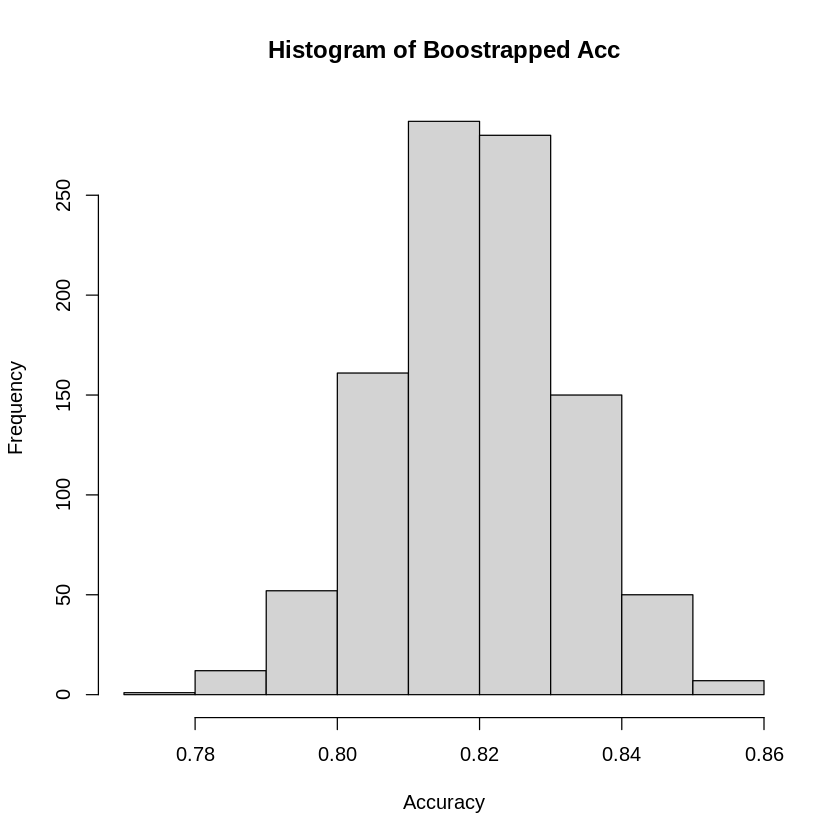

In [22]:
install.packages("ISLR")
library(ISLR)
library(boot)
calculate_accuracy <- function(data,model) {
prob <- predict(model, type = "response")
predict_gender <- ifelse(prob > 0.5, "Male", "Female")
conf_matrix <- table(predict_gender, data$Gender)
accuracy <- sum(diag(conf_matrix))/sum(conf_matrix)
return(accuracy)
}

n_bootstraps <- 1000
bootstrap_acc <- numeric(n_bootstraps)
for (i in 1:n_bootstraps) {
    boostrap_sample <- d1[sample(1:nrow(d1), nrow(d1), replace = TRUE), ]
    model_b <- glm(Gender ~ FS_Total_GM_Vol + FS_Tot_WM_Vol + FS_IntraCranial_Vol,
                 data = boostrap_sample,
                 family = binomial(link = "logit"))
    bootstrap_acc[i] <- calculate_accuracy (boostrap_sample, model_b)
}
hist(bootstrap_acc, main = "Histogram of Boostrapped Acc", xlab = "Accuracy")


How robust is the prediction accuracy of the full model?

> It's overall robust, the results are stable even when data changed. The Gauss bell shape is telling us the model is reliable and consistent predicting correctly around 82%.
>

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

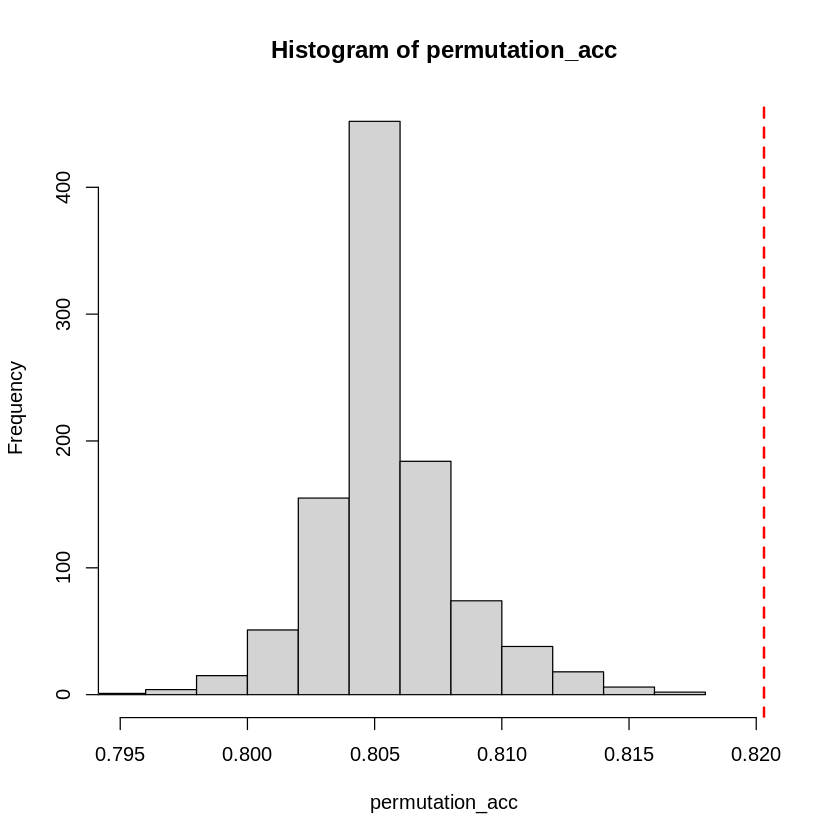

In [47]:

model_original <- glm(Gender ~ FS_Total_GM_Vol + FS_Tot_WM_Vol + FS_IntraCranial_Vol,
                 data = d1,
                 family = binomial(link = "logit"))
prob_original  <- predict(model_original, type = "response")
predict_gender_original <- ifelse(prob_original > 0.5, "Male", "Female")
conf_matrix_original <- table(predict_gender_original, d1$Gender)
original_accuracy <- sum(diag(conf_matrix_original))/sum(conf_matrix_original)

n_permutations <- 1000
permutation_acc <- numeric(n_permutations)
for (i in 1:n_permutations) {
    permuted_gm <- sample (d1$FS_Total_GM_Vol)
    d1_permuted <- d1
    d1_permuted$FS_Total_GM_Vol <- permuted_gm
    model_permuted <- glm(Gender ~ FS_Total_GM_Vol + FS_Tot_WM_Vol + FS_IntraCranial_Vol,
                 data = d1_permuted,
                 family = binomial(link = "logit"))
    prob_permuted <- predict(model_permuted, type = "response")
    predict_gender_permuted <- ifelse(prob_permuted > 0.5, "Male", "Female")
    conf_matrix_perm <- table (predict_gender_permuted, d1_permuted$Gender)
    permutation_acc[i] <- sum(diag(conf_matrix_perm)/ sum(conf_matrix_perm))
}

hist(permutation_acc,
     xlim = range(c(permutation_acc, original_accuracy)))

abline(v = original_accuracy, col = "red", lwd = 2, lty = 2)



How much does the grey matter volume influence the prediction accuracy of the model?

> According to the histogram and abline (representing previous model), the grey matter seems to have an important role predicting accuracy in the model. Even thought, we randomly permute the data, our original model show better accuracy.
>

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

*   Bootstrap: It is used when we don't know the data distribution and we have a small size to evaluate how robust is a model, and analyze how an statistic (mean, sd, CI) would change if we have more data.
*  Permutation: This is a method that simulate a H0 hypothesis distribution by shuffling the data. We use it when we want to check differences among groups without assuming a normal distribution (non-parametric).


>

**DUE:** 5pm EST, March 26, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I used Gemini to debugged my code.